In [1]:
# Import the libraraies

import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load the Dataset and Prepare testing and training data

from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 1126s 7us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
print(x_train.dtype)
print(x_test.dtype)

uint8
uint8


In [10]:
# Change the Datatype to float and Normalize It

x_train = x_train.astype("float64")/255
x_test = x_test.astype("float64")/255

In [11]:
x_train.dtype

dtype('float64')

In [12]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [13]:
# Do the one hot Encoding of the Dependent Variable using Keras.utils

from keras.utils import np_utils
from keras.utils import to_categorical

In [14]:
num_classes = len(np.unique(y_train))

In [15]:
num_classes

10

In [16]:
print(y_train)
len(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


50000

In [17]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [18]:
# Divide the Training Dataset into validation and Training

y_train, y_valid = y_train[5000:], y_train[:5000]
x_train , x_valid = x_train[5000:], x_train[:5000]

In [19]:
print(y_valid.shape)
print(x_valid.shape)

(5000, 10)
(5000, 32, 32, 3)


In [20]:
# Import the Deep Learning Libraries

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [21]:
# Build a CNN Architecture with Keras

In [24]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, activation = "relu", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 16, kernel_size =3, activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 16, kernel_size =3, activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)          0         
Total params: 5,088
Trainable params: 5,088
Non-trainable params: 0
____________________________________________________

In [26]:
model.add(Flatten())

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)               

In [28]:
# Stack an ANN on top of CNN

model.add(Dense(units = 512, activation = "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 512, activation = "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 512, activation = "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 512, activation = "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 512, activation = "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 512, activation = "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 10, activation = "softmax", kernel_initializer = "uniform"))

In [29]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)               

In [31]:
# Fit the model

ans = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), shuffle=True, epochs = 10, verbose=2, batch_size=500)

Epoch 1/10
90/90 - 13s - loss: 2.0867 - accuracy: 0.1718 - val_loss: 1.9501 - val_accuracy: 0.2122
Epoch 2/10
90/90 - 15s - loss: 1.8348 - accuracy: 0.2702 - val_loss: 1.7512 - val_accuracy: 0.3024
Epoch 3/10
90/90 - 15s - loss: 1.6975 - accuracy: 0.3333 - val_loss: 1.6384 - val_accuracy: 0.3630
Epoch 4/10
90/90 - 15s - loss: 1.6069 - accuracy: 0.3810 - val_loss: 1.5799 - val_accuracy: 0.3954
Epoch 5/10
90/90 - 15s - loss: 1.5390 - accuracy: 0.4140 - val_loss: 1.5305 - val_accuracy: 0.4188
Epoch 6/10
90/90 - 14s - loss: 1.4811 - accuracy: 0.4422 - val_loss: 1.4750 - val_accuracy: 0.4488
Epoch 7/10
90/90 - 18s - loss: 1.4193 - accuracy: 0.4694 - val_loss: 1.3981 - val_accuracy: 0.4770
Epoch 8/10
90/90 - 14s - loss: 1.3723 - accuracy: 0.4890 - val_loss: 1.3987 - val_accuracy: 0.4804
Epoch 9/10
90/90 - 14s - loss: 1.3449 - accuracy: 0.5042 - val_loss: 1.3501 - val_accuracy: 0.5080
Epoch 10/10
90/90 - 14s - loss: 1.2859 - accuracy: 0.5302 - val_loss: 1.3563 - val_accuracy: 0.5008


In [32]:
# Evaluate the Results

results = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.3583 - accuracy: 0.5054


In [33]:
results

[1.3583180904388428, 0.5054000020027161]

In [34]:
ans.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

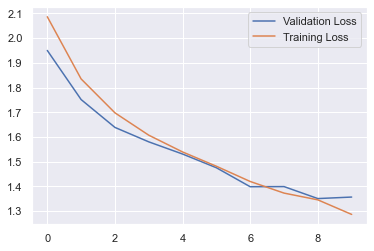

In [35]:
plt.plot(ans.history["val_loss"], label = "Validation Loss")
plt.plot(ans.history["loss"], label = "Training Loss")
plt.legend()

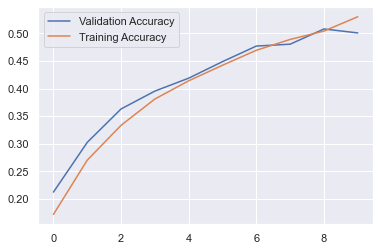

In [36]:
plt.plot(ans.history['val_accuracy'], label = "Validation Accuracy")
plt.plot(ans.history['accuracy'], label = "Training Accuracy")
plt.legend()